# Présentation des données

In [ ]:
# Exo 1 - Préparation des données 

# importation des données
import pandas as pd 
import numpy as np 
# import du fichier
data = pd.read_csv("synthetic.csv")

# Visualisation des données
print(data.head())


In [ ]:
# 1 - Nombre de colonnes (attributs) dans le DataFrame
num_attributes = data.shape[1]

# Afficher le nombre d'attributs
print(f"Le nombre d'attributs dans le fichier est : {num_attributes}")


In [ ]:
# Type de données et valeurs manquantes
print(data.info())

In [ ]:
# Avoir le nombre d'attributs dans le modèle
print(data.columns)
# 14 attributs dans le modèle

In [ ]:
# Obtenir les classes uniques dans la colonne 'Class'
classes_uniques = data['Class'].unique()

# Nombre de classes différentes
num_classes = len(classes_uniques)

# Afficher le nombre de classes différentes
print(f"Le nombre de classes différentes dans les données est : {num_classes}")

In [ ]:
# combien d'instances compte chaque classe?
nbr_instances = data['Class'].value_counts()
print(nbr_instances)

# Sortie 
# Class
# 1    908
# 0    674
# 2    472
# 3    244
# Name: count, dtype: int64

# Les données sont-elles linéairement séparables ?
Non, si on observe le schéma 1 on voit que les données ne le sont pas.
De plus si l'on choisit de les ranger par classe , on peut s'apercevoir que 


In [ ]:
import matplotlib.pyplot as plt # import biblio matplot
plt.figure(figsize=(10, 6))
plt.scatter(data['Attr_A'], data['Attr_B'], c=data['Class'], alpha=0.5, cmap='viridis')
plt.xlabel('Attribut 1')
plt.ylabel('Attribut 2')
plt.title('Scatter Plot des attributs par classe')
plt.colorbar(label='Classe')
plt.show()

# On peut voir clairement que ce n'est pas divisible linéairement à l'état brut
# je pense que use image est vraiment mieux


## 5 et 6 (voir compte-rendu.md) 

# 2 Mise en oeuvre des modèles

In [ ]:
# Choisir un attribut à analyser, par exemple 'Attr_A'
attribute = 'Attr_A'


# Calculer les quartiles pour l'attribut choisi
quartiles = data[attribute].quantile([0.25, 0.5, 0.75])

# Sort the attribute values and print them
sorted_attribute = data[attribute].sort_values()
print(sorted_attribute)
print(quartiles)
# Afficher les quartiles
print(f"Quartile 1 (Q1) de l'attribut '{attribute}': {quartiles[0.25]}")
print(f"Médiane (Q2) de l'attribut '{attribute}': {quartiles[0.5]}")
print(f"Quartile 3 (Q3) de l'attribut '{attribute}': {quartiles[0.75]}")


# 6 : 

# Partie 2 : Mise en oeuvre des modèles.

# Arbre de décision 


In [ ]:
# Arbre de décision

# Calcul de l'entropie

"""
L'entropie est une mesure de l'incertitude associée à une variable aléatoire.
"""

def entropie(dataframe , attribut_cible):  
    # Calcul de la probabilité de chaque classe
    compte_classe = dataframe[attribut_cible].value_counts()
    #print(compte_classe)
    proba = compte_classe / compte_classe.sum()
    #print(proba) 
    # Calcul de l'entropie
    entropie = - (proba * np.log2(proba+ np.finfo(float).eps)).sum() # éviter log2(0)
    return entropie

# Test de la fonction
print(entropie(data, 'Attr_A'))


11.166163082646115
11.166163082645376

11.166163082646115
11.166163082645376

11.166163082646115
11.166163082645376

1.8608867211835993
1.860886721183598

In [ ]:
import pandas as pd
import numpy as np

# Fonction pour calculer tous les quartiles d'un attribut donné
def calculate_quartiles(data, attribute):
    return data[attribute].quantile([0.25, 0.5, 0.75])

# Test de la fonction sur le DataFrame chargé

print(calculate_quartiles(data, 'Attr_A'))


In [ ]:
data

In [ ]:
data.sort_values(by="Attr_C")

In [ ]:
# data.head()
sorted = data.sort_values(by="Attr_A")
print(len(sorted))

In [ ]:
def gain_information(dataframe, attribut_cible, attribut_test):
    """
    Calculate the information gain from splitting the data based on a test attribute.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data to partition.
    attribut_cible (str): The target attribute we want to predict.
    attribut_test (str): The attribute whose gain we want to calculate.

    Returns:
    tuple: A tuple containing:
        - attribut_test (str): The test attribute.
        - max_gain (float): The maximum information gain obtained.
        - best_split_value (float): The split value that provides the best gain.
        - best_partitions (tuple): A tuple containing two DataFrames representing the lower and upper partitions
          resulting from the best split.
    """
    
    # Initial entropy of the target attribute
    entropie_initiale = entropie(dataframe, attribut_cible)

    # The gain, split_value and partitions initialized
    max_gain = 0
    best_split_value = None
    best_partitions = None

    # Check for no unique values in the attribute being tested
    if len(dataframe[attribut_test].unique()) <= 1:
        return None

    # Sorting data by the attribute to test
    sorted_data = dataframe.sort_values(by=attribut_test)

    # Unique values of the attribute to test, considering quartiles to reduce complexity
    quartiles = calculate_quartiles(sorted_data, attribut_test).to_list()

    # Adding the min and max values to cover the entire range of the attribute
    quartiles = [sorted_data[attribut_test].min()] + quartiles + \
        [sorted_data[attribut_test].max()]
    # Voir si je n'enlève pas min et max valeur

    # Iterating through the sorted unique values to find the best split
    for split_value in quartiles:
        # Partitioning the data based on the split value
        lower_partition = sorted_data[sorted_data[attribut_test] < split_value]
        upper_partition = sorted_data[sorted_data[attribut_test]
                                      >= split_value]

        # Calculating the weighted entropy for the partitions
        # Row counts.
        total_instances = len(sorted_data)
        lower_weight = len(lower_partition) / total_instances
        upper_weight = len(upper_partition) / total_instances

        # Computing the weighted_entropy
        weighted_entropy = (lower_weight * entropie(lower_partition, attribut_cible)) + \
                           (upper_weight * entropie(upper_partition, attribut_cible))

        # Information gain for the current split
        current_gain = entropie_initiale - weighted_entropy

        # If the current gain is greater than the max_gain, update max_gain and best_split_value
        if current_gain > max_gain:
            max_gain = current_gain
            best_split_value = split_value
            best_partitions = (lower_partition, upper_partition)

    # Returning the attribute, gain, split_value, and partitions as a tuple
    return attribut_test, max_gain, best_split_value, best_partitions


# Testing the function with an example attribute
# Let's use 'Attr_A' as the attribute to test and 'Class' as the target
test_gain_info = gain_information(data, 'Class', 'Attr_H')
test_gain_info

In [ ]:
def find_best_gain(dataframe, attribut_cible):
    """
    Calculate the best information gain and corresponding split in a DataFrame.
    
    Parameters:
    dataframe (pd.DataFrame): The input data as a pandas DataFrame.
    attribut_cible (str): The target attribute that we want to predict (e.g. 'Class').
    
    Returns:
    tuple: A tuple containing the following elements:
        - best_attribute (str): The attribute that yields the best information gain.
        - best_gain (float): The highest information gain observed.
        - best_split_value (float): The split value that produces the best gain.
        - best_partitions (tuple): A tuple containing the two partitions resulting from the best split.
    """
    # Initialize variables to track the best gain and the associated attribute
    best_gain = 0
    best_attribute = None
    best_split_value = None
    best_partitions = None

    # Iterate over all the attributes in the DataFrame, except the target attribute
    for test_attribute in dataframe.columns:
        if test_attribute == attribut_cible:
            continue  # Skip the target attribute

        # Calculate the information gain for the current attribute
        result = gain_information(dataframe, attribut_cible, test_attribute)

        # If the result is None, skip to the next attribute
        if result is None:
            continue

        # Unpack the result from gain_information
        _, current_gain, split_value, partitions = result

        # Update the variables if the current gain is higher than the best gain
        if current_gain > best_gain:
            best_gain = current_gain
            best_attribute = test_attribute
            best_split_value = split_value
            best_partitions = partitions

    # Return the best attribute, gain, split value, and partitions
    return best_attribute, best_gain, best_split_value, best_partitions


find_best_gain(data, 'Class')

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(dataframe, attribut_cible, test_size=0.2, random_state=42):
    """
    Splits the dataframe into training and testing sets.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data to split.
    attribut_cible (str): The target attribute we want to predict. e.g ("Class")
    test_size (float): The proportion of the data to include in the test split. Default is 0.2.
    random_state (int): Controls the shuffling applied to the data before applying the split. Default is 42.

    Returns:
    tuple: A tuple containing:
        - X_train (pd.DataFrame): The training features.
        - X_test (pd.DataFrame): The testing features.
        - y_train (pd.Series): The training target attribute.
        - y_test (pd.Series): The testing target attribute.
    """
    # Separate features and target attribute
    X = dataframe.drop(columns=[attribut_cible])
    y = dataframe[attribut_cible]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test =  split_data(data, "Class")

In [ ]:
class DecisionNode:
    def __init__(
            self,
            is_leaf,
            attribute=None,
            split_value=None,
            left=None,
            right=None,
            prediction=None):
        """
        Initialize a decision tree node.

        Parameters:
        is_leaf (bool): Whether the node is a leaf node.
        attribute (str, optional): The attribute to split on if the node is not a leaf.
        split_value (float, optional): The split value for the attribute if the node is not a leaf.
        left (DecisionNode, optional): The left child node.
        right (DecisionNode, optional): The right child node.
        value (object, optional): The target value if the node is a leaf.
        """
        self.is_leaf = is_leaf
        self.attribute = attribute
        self.split_value = split_value
        self.left = left
        self.right = right
        self.prediction = prediction

    def _is_leaf(self):
        return self.is_leaf

In [ ]:
class DecisionTree:
    """
    Represents a decision tree.

    Attributes:
    max_depth (int): The maximum depth of the tree.
    tree (DecisionNode): The root node of the tree.
    """

    def __init__(self, max_depth=8):
        """
        Initialize the decision tree.

        Parameters:
        max_depth (int, optional): The maximum depth of the tree. Default is 8.
        """
        self.max_depth = max_depth
        self.tree = None

    def _build_tree(self, data, target_attribute, depth=0):
        """
        Recursively build the decision tree.

        Parameters:
        data (pd.DataFrame): The input data as a pandas DataFrame.
        target_attribute (str): The target attribute that we want to predict.
        depth (int): The current depth of the tree.

        Returns:
        DecisionNode: The root node of the decision tree.
        """
        # Check stopping conditions: maximum depth or pure leaf
        if depth >= self.max_depth:
            # Return a leaf node with the most frequent target value
            prediction = data[target_attribute].mode()[0]
            return DecisionNode(is_leaf=True, prediction=prediction)

        # Check if the data is pure (all target values are the same)
        if data[target_attribute].nunique() == 1:
            # Return a leaf node with the unique target value
            prediction = data[target_attribute].iloc[0]
            return DecisionNode(is_leaf=True, prediction=prediction)

        # Find the best attribute, gain, split value, and partitions using find_best_gain
        best_attribute, best_gain, best_split_value, best_partitions = find_best_gain(
            data, target_attribute)

        # Check if no gain is found, return the most frequent target value as a leaf node
        if best_attribute is None or best_gain <= 0:
            prediction = data[target_attribute].mode()[0]
            return DecisionNode(is_leaf=True, prediction=prediction)

        # Create the decision node with the best attribute and split value
        left_data, right_data = best_partitions
        left_child = self._build_tree(left_data, target_attribute, depth + 1)
        right_child = self._build_tree(right_data, target_attribute, depth + 1)

        # Return the decision node with the children
        return DecisionNode(
            is_leaf=False,
            attribute=best_attribute,
            split_value=best_split_value,
            left=left_child,
            right=right_child
        )

    def fit(self, data, target_attribute):
        """
        Build the decision tree based on the provided data and target attribute. e.g ("Class")
        Parameters:
        data (pd.DataFrame): The input data as a pandas DataFrame.
        target_attribute (str): The target attribute that we want to predict.
        """
        self.tree = self._build_tree(data, target_attribute)

    def train(self, dataframe, target_attribute):
        """
        Train the decision tree using the given data.

        Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the training data.
        target_attribute (str): The target attribute we want to predict.
        """
        self.fit(dataframe, target_attribute)

    def predict(self, data):
        """
        Predict target attribute values for the given data using the decision tree.

        Parameters:
        data (pd.DataFrame): The data for which predictions are to be made.

        Returns:
        np.array: The predicted values of the target attribute.
        """
        predictions = data.apply(self._predict_single, axis=1)
        return predictions

    def _predict_single(self, row):
        """
        Predict the target attribute value for a single data point.

        Parameters:
        row (pd.Series): The data point as a pandas Series.

        Returns:
        object: The predicted value of the target attribute.
        """
        node = self.tree

        # Traverse the tree until a leaf node is reached
        while not node.is_leaf:
            attribute = node.attribute
            split_value = node.split_value

            if row[attribute] < split_value:
                node = node.left
            else:
                node = node.right

        # Return the value of the leaf node
        return node.prediction

    def print_tree(self, node=None, indent=""):
        """
        Print the decision tree in a human-readable way.

        Parameters:
        node (DecisionNode, optional): The current node to print. If not specified, starts with the root node.
        indent (str): Indentation for nested levels in the tree.
        """
        # If no node is specified, start with the root node
        if node is None:
            node = self.tree

        # Check if the current node is a leaf node
        if node._is_leaf():
            print(f"{indent}Leaf: Predict {node.prediction}")
        else:
            # Print the split condition and value at the current node
            print(f"{indent}Node: {node.attribute} < {node.split_value}")

            # Recursively print the left and right children
            print(f"{indent}Left:")
            self.print_tree(node.left, indent + "    ")

            print(f"{indent}Right:")
            self.print_tree(node.right, indent + "    ")

## Class qui permet d'évaluer notre model.

In [ ]:
class EvaluationMetrics:
    """
    Classe pour calculer les métriques d'évaluation.
    """
    @staticmethod
    def accuracy_score(y_true, y_pred):
        """
        Calcule l'exactitude entre les valeurs réelles et prédites.
        
        Arguments:
        y_true -- Les valeurs réelles (cibles).
        y_pred -- Les valeurs prédites par le modèle.
        
        Retourne:
        float -- L'exactitude.
        """
        correct_predictions = sum(y_true == y_pred)
        total_predictions = len(y_true)
        return correct_predictions / total_predictions

    @staticmethod
    def precision_score(y_true, y_pred, positive_label):
        """
        Calcule la précision pour une classe positive spécifiée.
        
        Arguments:
        y_true -- Les valeurs réelles (cibles).
        y_pred -- Les valeurs prédites par le modèle.
        positive_label -- La classe positive pour laquelle calculer la précision.
        
        Retourne:
        float -- La précision.
        """
        true_positives = sum((y_true == positive_label) & (y_pred == positive_label))
        predicted_positives = sum(y_pred == positive_label)
        if predicted_positives == 0:
            return 0.0
        return true_positives / predicted_positives

    @staticmethod
    def recall_score(y_true, y_pred, positive_label):
        """
        Calcule le rappel pour une classe positive spécifiée.
        
        Arguments:
        y_true -- Les valeurs réelles (cibles).
        y_pred -- Les valeurs prédites par le modèle.
        positive_label -- La classe positive pour laquelle calculer le rappel.
        
        Retourne:
        float -- Le rappel.
        """
        true_positives = sum((y_true == positive_label) & (y_pred == positive_label))
        actual_positives = sum(y_true == positive_label)
        if actual_positives == 0:
            return 0.0
        return true_positives / actual_positives

    @staticmethod
    def f1_score(y_true, y_pred, positive_label):
        """
        Calcule le score F1 pour une classe positive spécifiée.
        
        Arguments:
        y_true -- Les valeurs réelles (cibles).
        y_pred -- Les valeurs prédites par le modèle.
        positive_label -- La classe positive pour laquelle calculer le score F1.
        
        Retourne:
        float -- Le score F1.
        """
        precision = EvaluationMetrics.precision_score(y_true, y_pred, positive_label)
        recall = EvaluationMetrics.recall_score(y_true, y_pred, positive_label)
        
        if precision == 0 and recall == 0:
            return 0.0
        
        return 2 * (precision * recall) / (precision + recall)


In [ ]:
def train_and_evaluate_decision_trees(X_train, y_train, X_test, y_test, depths):
    """
    Train decision tree models with different maximum depths and evaluate their performance.

    Args:
        X_train: Training features (data).
        y_train: Training target (labels).
        X_test: Testing features (data).
        y_test: Testing target (labels).
        depths (list): List of maximum depths to test for decision trees.

    Returns:
        List of tuples containing the accuracy scores and corresponding models.
        The list is sorted in descending order based on accuracy scores.
    """
    # Combine features and labels for training and testing sets
    train_data = pd.concat([X_train, y_train], axis=1)
    test_data = pd.concat([X_test, y_test], axis=1)

    # List to store the models and their accuracy scores
    models_and_scores = []

    # Train and evaluate models with different maximum depths
    for max_depth in depths:
        # Create a decision tree classifier with the specified maximum depth
        model = DecisionTree(max_depth=max_depth)
        
        # Train the model on the combined training set
        model.train(train_data, y_train.name)  # Pass the name of the target attribute
        
        # Predict on the combined test set
        y_pred = model.predict(test_data)
        
        # Calculate the accuracy of the model using the provided y_test
        accuracy = EvaluationMetrics.accuracy_score(y_test, y_pred)
        
        # Append the accuracy score and model to the list
        models_and_scores.append((accuracy, model))
        
        # Print the results for the current model
        print(f"Max Depth: {max_depth}, Accuracy: {accuracy:.4f}")
    
    # Sort the list of models and scores in descending order based on accuracy
    models_and_scores.sort(key=lambda x: x[0], reverse=True)
    
    return models_and_scores

In [ ]:
target_attribute  = "Class"
X_train, X_test, y_train, y_test = split_data(data, target_attribute)
models_and_scores = train_and_evaluate_decision_trees(X_train, y_train, X_test, y_test, [3, 4, 5, 6, 7, 8])
print(models_and_scores)

## Two best models

In [ ]:
best_model = models_and_scores[0]
second_best_model = models_and_scores[1]

print("Best model", best_model)
print("Second Best model", second_best_model)

## Test of DecisionNode and DecisionTree class

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the target attribute
target_attribute = "Class"

# Split the data into training and testing sets using the split_data function
X_train, X_test, y_train, y_test = split_data(data, target_attribute)

# Instantiate the DecisionTree class
decision_tree = DecisionTree(max_depth=8)
evaluation_metric = EvaluationMetrics()

# Train the decision tree using the training data
decision_tree.train(pd.concat([X_train, y_train], axis=1), target_attribute)

# Predict the target attribute for the testing data
predictions = decision_tree.predict(pd.concat([X_test, y_test], axis=1))

# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, predictions)
eval_accuracy = evaluation_metric.accuracy_score(y_test, predictions)

precision = precision_score(y_test, predictions, average='weighted')
eval_precision = evaluation_metric.precision_score(y_test, predictions, positive_label=1)

recall = recall_score(y_test, predictions, average='weighted')
eval_recall = evaluation_metric.recall_score(y_test, predictions, positive_label=1)

f1 = f1_score(y_test, predictions, average='weighted')
eval_f1 = evaluation_metric.f1_score(y_test, predictions, positive_label=1)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Eval Accuracy: {eval_accuracy:.2f}")

print(f"Precision: {precision:.2f}")
print(f"Eval Precision: {eval_precision:.2f}")

print(f"Recall: {recall:.2f}")
print(f"Eval Recall: {eval_recall:.2f}")

print(f"F1-score: {f1:.2f}")
print(f"Eval F1-score: {eval_f1:.2f}")

decision_tree.print_tree()


# 2.2 Réseaux de neurones artificiels

### 1 - Division des données.

In [ ]:
from sklearn.model_selection import train_test_split


def neural_split_data(data, target_attribute):
    # Divisez les données en jeu d'entraînement et de test (85% et 15%)
    train_data, test_data = train_test_split(
        data, test_size=0.15, random_state=42)

    # Divisez le jeu d'entraînement en sous-ensemble d'entraînement et de validation (85% et 15%)
    train_data, val_data = train_test_split(
        train_data, test_size=0.15/0.85, random_state=42)

    # Séparez les données et les labels
    X_train, y_train = train_data.drop(
        columns=[target_attribute]), train_data[target_attribute]
    X_val, y_val = val_data.drop(
        columns=[target_attribute]), val_data[target_attribute]
    X_test, y_test = test_data.drop(
        columns=[target_attribute]), test_data[target_attribute]

    return X_train, y_train, X_val, y_val, X_test, y_test

### 2 - Création de la classe "NeuralNetwork"

In [55]:
import numpy as np


class NeuralNetwork:
    def __init__(self, architecture, activation='relu'):
        """
        Initialize the neural network with a specific architecture and activation function.

        Parameters:
        - architecture (list of int): List of integers representing the number of neurons in each layer.
        - activation (str): The activation function to use ('relu' or 'softmax').
        """
        self.architecture = architecture
        self.activation = activation

        # Initialize weights and biases
        self.weights = []
        self.biases = []
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Initialize weights and biases for the network layers.
        """
        np.random.seed(42)
        layer_sizes = self.architecture

        for i in range(1, len(layer_sizes)):
            scale = np.sqrt(2 / (layer_sizes[i - 1] + layer_sizes[i]))
            weight_matrix = np.random.randn(
                layer_sizes[i], layer_sizes[i - 1]) * scale
            bias_vector = np.zeros((layer_sizes[i], 1))

            self.weights.append(weight_matrix)
            self.biases.append(bias_vector)

    def activation_function(self, x, layer_index=None):
        """
        Apply the specified activation function.

        Parameters:
        - x (np.array): Input array.

        Returns:
        - np.array: Output array with activation applied.
        """
        # print(f"layer_index = {layer_index}")
        if layer_index == len(self.architecture) - 1:
            # print(f"layer_index {layer_index}")
            # Use softmax for the last hidden layer for classification
            exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
            return exp_x / np.sum(exp_x, axis=0, keepdims=True)
        elif self.activation == 'tanh':
            return np.tanh(x)
        elif self.activation == 'relu':
            return np.maximum(0, x)
        else:
            raise ValueError(
                "Invalid activation function. Use 'tanh' or 'relu'.")

    def activation_derivative(self, x):
        """
        Compute the derivative of the specified activation function.

        Parameters:
        - x (np.array): Input array.

        Returns:
        - np.array: Derivative of the activation function.
        """
        if self.activation == 'tanh':
            return 1 - np.tanh(x)**2
        elif self.activation == 'relu':
            return (x > 0).astype(float)
        else:
            raise ValueError(
                "Invalid activation function. Use 'tanh' or 'relu'.")

    def forward_propagation(self, X):
        """
        Perform forward propagation.

        Parameters:
        - X (np.array): Input data.

        Returns:
        - List of activations and z-values at each layer.
        """
        activations = [X.T]
        zs = []

        for i in range(len(self.architecture) - 1):
            z = np.dot(self.weights[i], activations[-1]) + self.biases[i]
            zs.append(z)
            activation = self.activation_function(z, i)

            # Appliquer la fonction d'activation sauf pour la dernière couche
            activations.append(activation)

        return activations, zs

    def backward_propagation(self, activations, zs, y):
        """
        Perform backward propagation and calculate gradients.

        Parameters:
        - activations (list of np.array): List of activations at each layer.
        - zs (list of np.array): List of z-values at each layer.
        - y (np.array): True labels.

        Returns:
        - Tuple containing gradients of weights and biases.
        """
        m = y.shape[1]
        dw = []
        db = []

        # Compute the gradient of the last layer
        # Difference between predicted and actual labels
        dz = activations[-1] - y

        # Backpropagate the gradients
        for i in range(len(self.architecture) - 1, 0, -1):
            dw_i = np.dot(dz, activations[i - 1].T) / m
            db_i = np.sum(dz, axis=1, keepdims=True) / m

            dw.append(dw_i)
            db.append(db_i)

            if i > 1:
                dz = np.dot(self.weights[i - 1].T, dz) * \
                    self.activation_derivative(zs[i - 2])

        # Reverse gradients to match the order of weights and biases
        return dw[::-1], db[::-1]

    def update_parameters(self, dw, db, learning_rate):
        """
        Update the network parameters (weights and biases) using the given gradients.

        Parameters:
        - dw (list of np.array): Gradients of weights.
        - db (list of np.array): Gradients of biases.
        - learning_rate (float): Learning rate for the update.
        """
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * dw[i]
            self.biases[i] -= learning_rate * db[i]

        # print("weight_new_shape", self.weights[i].shape)i
        # print("bais_new_shape", self.biases[i].shape)

    def _shuffle_data(self, X_train, y_train):
        N, _ = X_train.shape
        shuffled_idx = np.random.permutation(N)
        return X_train.iloc[shuffled_idx], y_train.iloc[shuffled_idx]

    def train(self, X_train, y_train, X_val, y_val, learning_rate=0.01, epochs=100, patience=4, batch_size=4):
        """
        Train the network using the given data.

        Parameters:
        - X_train (np.array): Training data.
        - y_train (np.array): Training labels.
        - X_val (np.array): Validation data.
        - y_val (np.array): Validation labels.
        - learning rate (float): Learning rate for training.
        - epochs (int): Number of epochs to train for.
        - patience (int): Patience for early stopping.
        - batch_size (int): Size of mini-batch for training.
        """
        best_val_loss = float('inf')
        patience_counter = 0
        N, D = X_train.shape
        # print(f"X_train.shape = {X_train.shape}")

        # Lists to store losses at each epoch
        train_losses = []
        test_losses = []

        # print(X_train.shape)
        # Training loop
        for epoch in range(epochs):
            # Shuffle the training data
            X_train_shuffled, y_train_shuffled = self._shuffle_data(
                X_train, y_train)

            # Mini-batch training
            num_batches = N // batch_size
            # print(f"num_batches {num_batches}")
            for batch_idx in range(num_batches):
                # Récupérez le mini-lot
                start = batch_idx * batch_size
                end = start + batch_size

                # Utilisez X_train_shuffled[start:end] pour obtenir le mini-lot
                X_batch = X_train_shuffled[start:end]

                # Transposez X_batch pour avoir les dimensions (14, batch_size)
                X_batch = np.array(X_batch)

                # Utilisez y_train_shuffled[start:end] pour obtenir les étiquettes du mini-lot
                y_batch = y_train_shuffled[start:end]
                y_batch = np.array(y_batch)
                y_batch = np.eye(4)[y_batch]
                # y_batch = y_batch.reshape((4, 1))

                # print(f"X_bath = {X_batch.shape}")
                # print(f"Y_batch = {y_batch.shape}")

                # Effectuez la propagation avant
                activations, zs = self.forward_propagation(X_batch)

                # Effectuez la propagation arrière
                dw, db = self.backward_propagation(activations, zs, y_batch)

                # Mettez à jour les paramètres
                self.update_parameters(dw, db, learning_rate)

            # Calculate training loss for the epoch
            train_loss = self.calculate_loss(X_train, y_train)
            train_losses.append(train_loss)

            # Calculate validation loss for the epoch
            test_loss = self.calculate_loss(X_test, y_test)
            test_losses.append(test_loss)

            val_loss = self.calculate_loss(X_val, y_val)

            # Check for early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break

            # Display progress
            print(
                f"Epoch {epoch + 1}/{epochs}: Validation loss = {test_loss:.4f}")

        return train_losses, test_losses

    def calculate_loss(self, X, y):
        """
        Calculate loss using categorical cross-entropy.

        Parameters:
        - X (np.array): Input data.
        - y (np.array): True labels.

        Returns:
        - float: Calculated loss.
        """

        # Effectuer la propagation avant
        activations, _ = self.forward_propagation(X)
        y = np.eye(4)[y]

        # La dernière activation (sortie du réseau) après la propagation avant
        activations_finales = activations[-1].T

        # Nombre de samples (exemples)
        m = X.shape[0]

        # Éviter la division par zéro en ajoutant un petit nombre epsilon
        epsilon = 1e-8  # Valeur très faible pour prévenir les valeurs infinies

        # Calcul de la perte de cross-entropie catégorielle
        loss = - \
            np.sum(y * np.log(np.clip(activations_finales, epsilon, 1 - epsilon))) / m
        return loss

    def predict(self, X):
        """
        Predict the labels for the given input data.

        Parameters:
        - X (np.array): Input data.

        Returns:
        - np.array: Predicted labels.
        """
        activations, _ = self.forward_propagation(X)
        # Use np.argmax to return the class index with the highest probability
        return np.argmax(activations[-1], axis=0)

In [ ]:
# Spécifiez le nom de la colonne cible
target_attribute = "Class"

# Divisez les données en ensembles d'entraînement, de validation et de test
X_train, y_train, X_val, y_val, X_test, y_test = neural_split_data(
    data, target_attribute)

### 3. Entraînement

In [ ]:
import matplotlib.pyplot as plt

def plot_train_and_test_errors(train_losses, val_losses):
    """
    Plot the training and validation errors over epochs.

    Parameters:
    - train_losses (list of float): Training errors for each epoch.
    - val_losses (list of float): Validation errors for each epoch.
    """
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label='Train Error', linestyle='-' )
    plt.plot(epochs, val_losses, label='Test Error', linestyle='--')
    
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Training and Validation Error Over Epochs')
    plt.legend()
    
    plt.show()

In [ ]:
def train_models(X_train, y_train, X_val, y_val, architectures, activations, learning_rate=0.01, epochs=100, patience=4, batch_size=4):
    """
    Train multiple neural network models with specified architectures and activations.

    Parameters:
    - X_train (np.array): Training data.
    - y_train (np.array): Training labels.
    - X_val (np.array): Validation data.
    - y_val (np.array): Validation labels.
    - architectures (list of lists): List of architectures (list of integers) to train.
    - activations (list of str): List of activation functions to use ('tanh' and 'relu').
    - learning_rate (float): Learning rate for training.
    - epochs (int): Number of epochs to train for.
    - patience (int): Patience for early stopping.
    - batch_size (int): Size of mini-batch for training.

    Returns:
    - dict: Dictionary containing trained models for each architecture and activation function.
    """
    models = {}

    # Train models for each architecture and activation function
    for activation in activations:
        for architecture in architectures:
            # Create neural network model
            model = NeuralNetwork(architecture, activation)

            # Train the model
            train_losses, test_losses = model.train(X_train, y_train, X_val, y_val, learning_rate=learning_rate,
                                                    epochs=epochs, patience=patience, batch_size=batch_size)

            plot_train_and_test_errors(train_losses, test_losses)
            # diff = [train - test for train, test in zip(train_losses, test_losses)]

            # print(diff)
            # Store the trained model
            models[f"{activation}_{architecture}"] = model

    return models

Epoch 1/1000: Validation loss = 3.7455
Epoch 2/1000: Validation loss = 3.4467
Epoch 3/1000: Validation loss = 3.3567
Epoch 4/1000: Validation loss = 3.2316
Epoch 5/1000: Validation loss = 3.2634
Epoch 6/1000: Validation loss = 3.3169
Epoch 7/1000: Validation loss = 3.3057
Epoch 8/1000: Validation loss = 3.3558
Epoch 9/1000: Validation loss = 3.1954
Early stopping at epoch 10


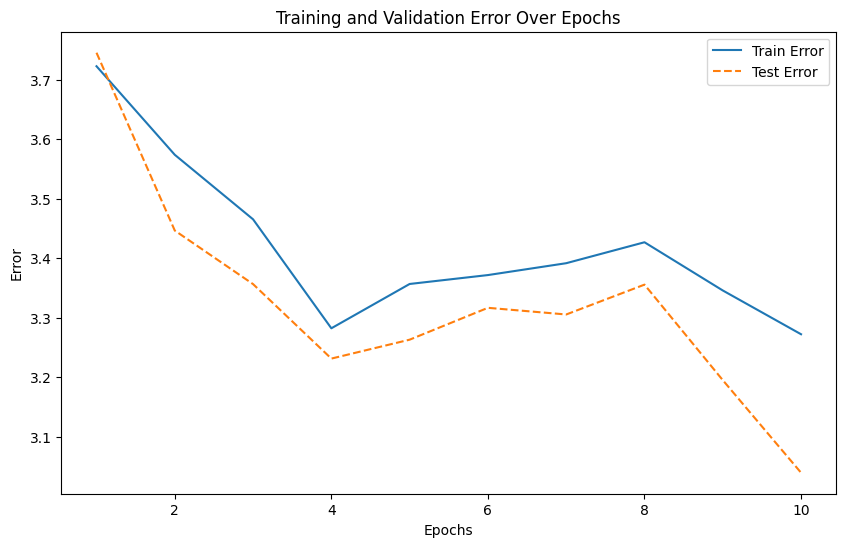

Epoch 1/1000: Validation loss = 8.3830
Epoch 2/1000: Validation loss = 8.0472
Epoch 3/1000: Validation loss = 7.5935
Epoch 4/1000: Validation loss = 7.5240
Epoch 5/1000: Validation loss = 7.2604
Epoch 6/1000: Validation loss = 7.2176
Early stopping at epoch 7


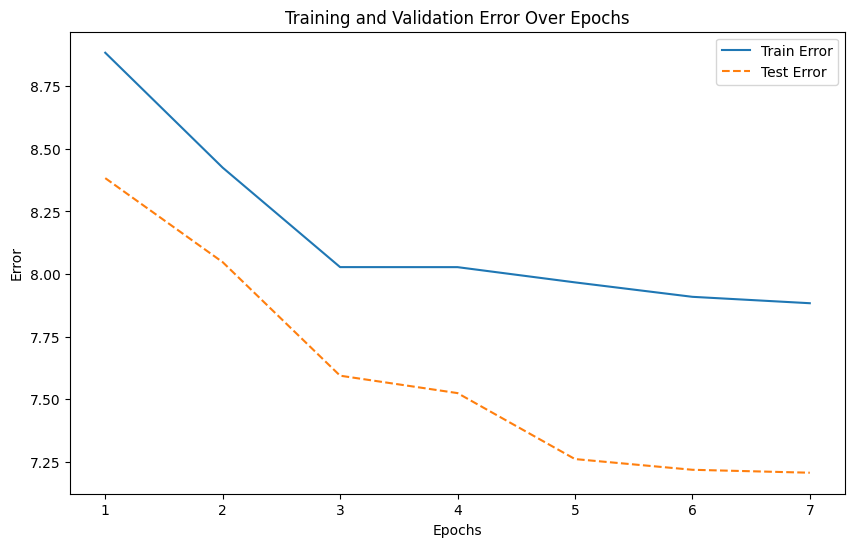

Epoch 1/1000: Validation loss = 8.9540
Epoch 2/1000: Validation loss = 8.9607
Epoch 3/1000: Validation loss = 8.9692
Epoch 4/1000: Validation loss = 8.9772
Early stopping at epoch 5


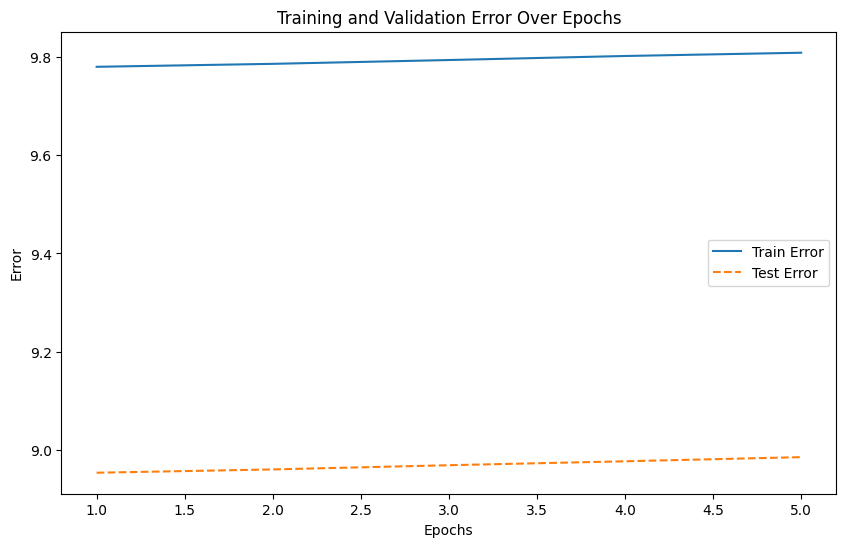

Epoch 1/1000: Validation loss = 7.0840
Epoch 2/1000: Validation loss = 6.3870
Epoch 3/1000: Validation loss = 6.0019
Epoch 4/1000: Validation loss = 5.6872
Epoch 5/1000: Validation loss = 5.4666
Epoch 6/1000: Validation loss = 5.2869
Epoch 7/1000: Validation loss = 5.1353
Epoch 8/1000: Validation loss = 4.9651
Epoch 9/1000: Validation loss = 4.8496
Epoch 10/1000: Validation loss = 4.7465
Epoch 11/1000: Validation loss = 4.6535
Epoch 12/1000: Validation loss = 4.5283
Epoch 13/1000: Validation loss = 4.4504
Epoch 14/1000: Validation loss = 4.3784
Epoch 15/1000: Validation loss = 4.3116
Epoch 16/1000: Validation loss = 4.2491
Epoch 17/1000: Validation loss = 4.1906
Epoch 18/1000: Validation loss = 4.1356
Epoch 19/1000: Validation loss = 4.0836
Epoch 20/1000: Validation loss = 4.0344
Epoch 21/1000: Validation loss = 3.9877
Epoch 22/1000: Validation loss = 3.9011
Epoch 23/1000: Validation loss = 3.8586
Epoch 24/1000: Validation loss = 3.8181
Epoch 25/1000: Validation loss = 3.7792
Epoch 26/

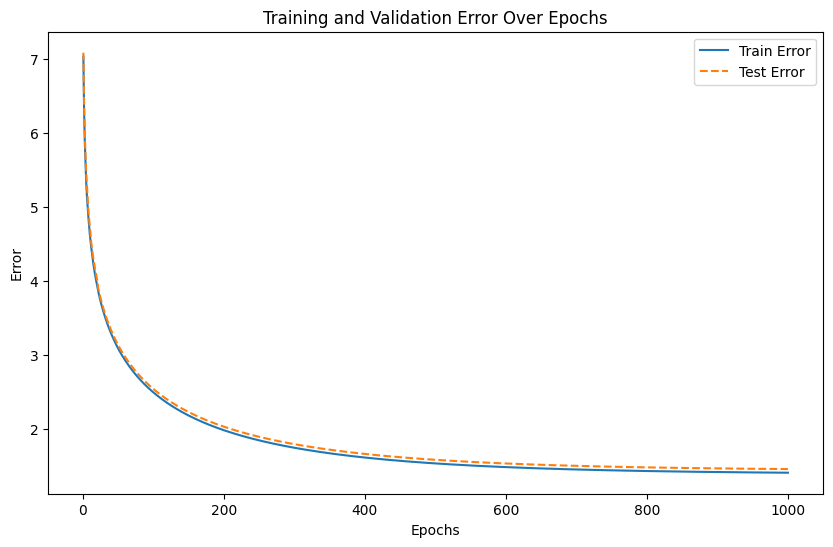

Epoch 1/1000: Validation loss = 7.1107
Epoch 2/1000: Validation loss = 6.2981
Epoch 3/1000: Validation loss = 5.8657
Epoch 4/1000: Validation loss = 5.5657
Epoch 5/1000: Validation loss = 5.3360
Epoch 6/1000: Validation loss = 5.1501
Epoch 7/1000: Validation loss = 4.9940
Epoch 8/1000: Validation loss = 4.8595
Epoch 9/1000: Validation loss = 4.7414
Epoch 10/1000: Validation loss = 4.6362
Epoch 11/1000: Validation loss = 4.5414
Epoch 12/1000: Validation loss = 4.4551
Epoch 13/1000: Validation loss = 4.3760
Epoch 14/1000: Validation loss = 4.3030
Epoch 15/1000: Validation loss = 4.2352
Epoch 16/1000: Validation loss = 4.1720
Epoch 17/1000: Validation loss = 4.1128
Epoch 18/1000: Validation loss = 4.0570
Epoch 19/1000: Validation loss = 4.0045
Epoch 20/1000: Validation loss = 3.9548
Epoch 21/1000: Validation loss = 3.9076
Epoch 22/1000: Validation loss = 3.8627
Epoch 23/1000: Validation loss = 3.8199
Epoch 24/1000: Validation loss = 3.7790
Epoch 25/1000: Validation loss = 3.7399
Epoch 26/

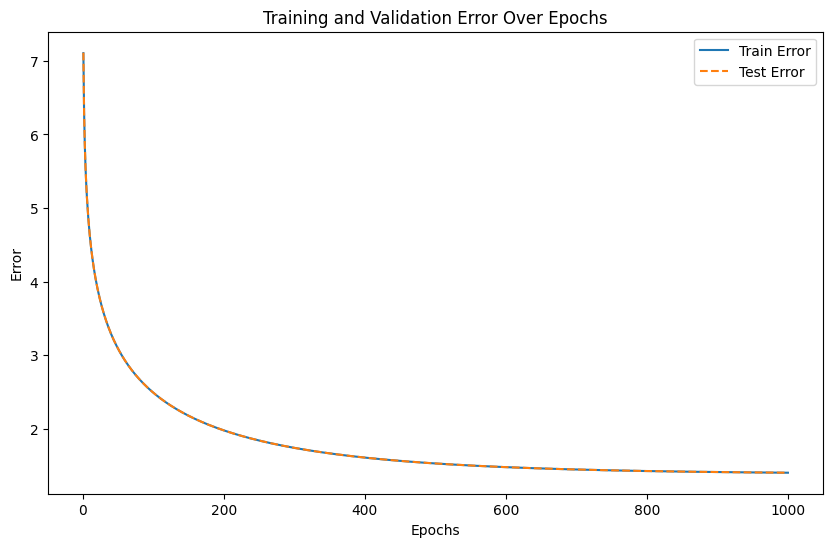

Epoch 1/1000: Validation loss = 7.4468
Epoch 2/1000: Validation loss = 6.4303
Epoch 3/1000: Validation loss = 5.9623
Epoch 4/1000: Validation loss = 5.6100
Epoch 5/1000: Validation loss = 5.3709
Epoch 6/1000: Validation loss = 5.1788
Epoch 7/1000: Validation loss = 5.0184
Epoch 8/1000: Validation loss = 4.8807
Epoch 9/1000: Validation loss = 4.7601
Epoch 10/1000: Validation loss = 4.6530
Epoch 11/1000: Validation loss = 4.5565
Epoch 12/1000: Validation loss = 4.4690
Epoch 13/1000: Validation loss = 4.3887
Epoch 14/1000: Validation loss = 4.3148
Epoch 15/1000: Validation loss = 4.2462
Epoch 16/1000: Validation loss = 4.1823
Epoch 17/1000: Validation loss = 4.1224
Epoch 18/1000: Validation loss = 4.0662
Epoch 19/1000: Validation loss = 4.0131
Epoch 20/1000: Validation loss = 3.9629
Epoch 21/1000: Validation loss = 3.9153
Epoch 22/1000: Validation loss = 3.8701
Epoch 23/1000: Validation loss = 3.8269
Epoch 24/1000: Validation loss = 3.7857
Epoch 25/1000: Validation loss = 3.7463
Epoch 26/

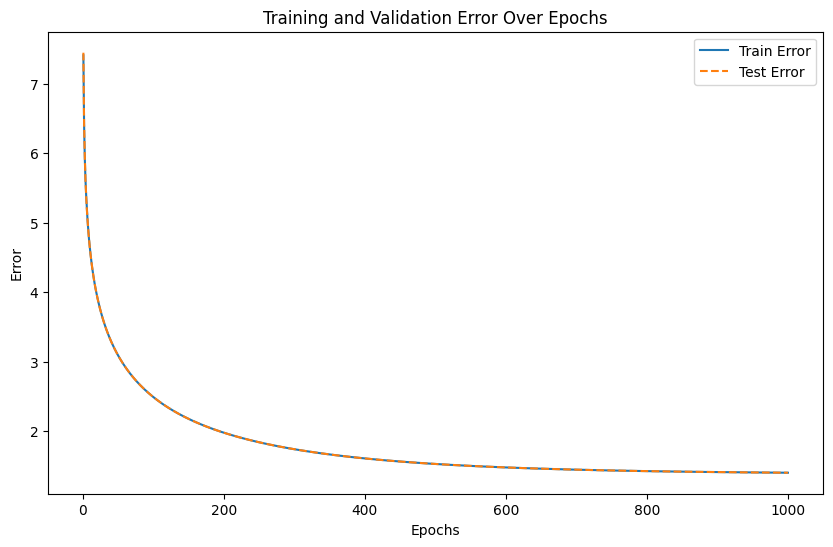

In [63]:
# Importation nécessaire
import numpy as np

# Définition des architectures et des activations
architectures = [(14, 10, 8, 6, 4), (14, 10, 8, 4, 4), (14, 6, 4, 4)]
activations = ["tanh", "relu"]

# Définition du taux d'apprentissage
learning_rate = 0.00001

# Nombre d'époques et patience pour l'arrêt anticipé
epochs = 1500
patience = 4

# Appel de la fonction train_models pour entraîner les modèles
models = train_models(X_train, y_train, X_val, y_val, architectures, activations,
                      learning_rate=learning_rate, epochs=epochs, patience=patience)

# Les modèles entraînés sont stockés dans le dictionnaire `models`


### 4. Evaluation

In [57]:
def evaluate_models(models, X_test, y_test):
    """
    Evaluate trained models on the test data.

    Parameters:
    - models (dict): Dictionary containing trained models.
    - X_test (np.array): Test data.
    - y_test (np.array): Test labels.
    
    Returns:
    - dict: Dictionary containing predictions and evaluation metrics for each model.
    """
    results = {}
    
    # Evaluate each model
    for model_name, model in models.items():
        # Predict the test data
        predictions = model.predict(X_test)
        
        # Calculate loss (or other evaluation metrics)
        
        # loss = model.calculate_loss(X_test, y_test)

        accuracy = np.mean(predictions == y_test)

        
        # Store results
        results[model_name] = {
            "predictions": predictions,
            "accuracy": accuracy
        }
        
    return results

In [58]:

results = evaluate_models(models, X_test, y_test)
results

{'tanh_(14, 10, 8, 6, 4)': {'predictions': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
plot_predictions_vs_actual(results, y_test)

### Utilisation des données dans le dossier Predictions 

In [ ]:
import pandas as pd
import numpy as np

# Charger les données de prédictions et de vérité terrain
predictions_folder = './Predictions/'
y_test = pd.read_csv(predictions_folder + 'y_test.csv')
y_test = y_test.values.squeeze()  # Conversion en numpy array



# Charger les prédictions de différents modèles
y_pred_files = [
    'y_pred_DT4.csv',
    'y_pred_DT5.csv',
    'y_pred_DT6.csv',
    'y_pred_NN_relu_10-8-4.csv',
    'y_pred_NN_relu_10-8-6.csv',
    'y_pred_NN_relu_6-4.csv',
    'y_pred_NN_tanh_10-8-4.csv',
    'y_pred_NN_tanh_10-8-6.csv',
    'y_pred_NN_tanh_6-4.csv'
]

# Parcourir les fichiers de prédictions et les charger
y_pred_dict = {}
for file in y_pred_files:
    key = file[:-4]  # Retirer '.csv' du nom de fichier
    y_pred_dict[key] = pd.read_csv(predictions_folder + file).values.squeeze()

# Créer et entraîner un modèle de réseau de neurones
# Vous pouvez définir votre propre architecture et fonction d'activation ici
architecture = [14, 10, 8, 6, 4]  # Exemple d'architecture
activation = 'relu'  # Exemple de fonction d'activation

# Créez une instance de NeuralNetwork
model = NeuralNetwork(architecture, activation)

# Utilisez vos fonctions train et évaluation pour entraîner et évaluer votre modèle
# Utilisez les fonctions train et évaluation de votre modèle pour les prédictions
train_losses, val_losses = model.train(X_train, y_train, X_val, y_val,
                                       learning_rate=0.01, epochs=100,
                                       patience=4)

# Utilisez la méthode predict pour obtenir des prédictions sur les données de test
predictions = model.predict(X_test)

print(predictions)

# Calcul de l'accuracy et de la perte
# accuracy = np.mean(predictions == y_test)
# loss = model.calculate_loss(X_test, y_test)

# Afficher les résultats
print(f"Accuracy: {accuracy:.4f}")
print(f"Loss: {loss:.4f}")



In [ ]:
import pandas as pd
import numpy as np

# Charger les valeurs de test (y_test) depuis y_test.csv
y_test = pd.read_csv('./Predictions/y_test.csv')

# Assurez-vous que la colonne cible "Class" existe dans y_test
# Affichez les colonnes de y_test pour vérifier
print(y_test.columns)

# Charger les prédictions combinées (X)
prediction_files = [
    './Predictions/y_pred_DT4.csv',
    './Predictions/y_pred_DT5.csv',
    './Predictions/y_pred_DT6.csv',
    './Predictions/y_pred_NN_relu_10-8-4.csv',
    './Predictions/y_pred_NN_relu_10-8-6.csv',
    './Predictions/y_pred_NN_relu_6-4.csv',
    './Predictions/y_pred_NN_tanh_10-8-4.csv',
    './Predictions/y_pred_NN_tanh_10-8-6.csv',
    './Predictions/y_pred_NN_tanh_6-4.csv'
]

# Charger les prédictions et les combiner en un DataFrame (X)
predictions_list = [pd.read_csv(file) for file in prediction_files]
X = pd.concat(predictions_list, axis=1)

# Vérifiez que les données sont alignées correctement (mêmes index)

print(X.index.equals(y_test.index))
# Renommer la colonne de y_test pour 'Class' si nécessaire
y_test = y_test.rename(columns={y_test.columns[0]: 'Class'})

# Convertir la colonne 'Class' de y_test en type entier
y_test['Class'] = y_test['Class'].astype(int)


# Instancier le réseau neuronal avec l'architecture souhaitée
# Par exemple, architecture = [nombre_de_neurones_entrée, neurones_couche_cache, neurones_sortie]
# Choisissez une architecture en fonction de vos besoins
architecture = [X.shape[1], 10, 8, 6, 4]

# Choisissez une fonction d'activation (par exemple, 'relu' ou 'tanh')
activation = 'relu'

# Créez une instance du réseau neuronal
neural_network = NeuralNetwork(architecture, activation=activation)

# Définissez les hyperparamètres
learning_rate = 0.01
epochs = 2000
patience = 128  # Pour l'arrêt précoce
batch_size = 4

# Entraînez le modèle en appelant la méthode train avec X, y_test["Class"], et les hyperparamètres
train_losses, val_losses = neural_network.train(
    X, y_test['Class'], X, y_test['Class'],  # X et y_test sont utilisés comme données de validation également
    learning_rate=learning_rate,
    epochs=epochs,
    patience=patience,
    batch_size=batch_size
)

# Affichez les pertes d'entraînement et de validation
print(f"Pertes d'entraînement : {train_losses}")
print(f"Pertes de validation : {val_losses}")

# # Utilisez le réseau neuronal pour faire des prédictions
nn_predictions = neural_network.predict(X)

# # Comparez les prédictions avec les valeurs réelles pour calculer la précision
accuracy = (nn_predictions == y_test['Class']).mean()
print(f"Précision du réseau neuronal : {accuracy:.2%}")

In [ ]:
# Instancier les modèles
neural_network_model = NeuralNetwork(architecture=[14, 10, 8, 4, 4], activation='relu')
decision_tree_model = DecisionTree(max_depth=5)
decision_tree_model.fit(X, y_test)

In [ ]:
# Spécifiez le nom de la colonne cible
target_attribute = "Class"

# Divisez les données en ensembles d'entraînement, de validation et de test
X_train, y_train, X_val, y_val, X_test, y_test = neural_split_data(data, target_attribute)

# print(np.arange(X_train.shape[0]))
# indices = np.arange(X_train.shape[0])
# np.random.shuffle(indices)
# print(indices)
# shuffled = X_train.iloc[indices]
# print(shuffled)
# print(f"X_train shape {X_train.shape}")
# print("X_train", X_train.head())
# print(f"y_train shape {y_train.shape}")
# print(f"y_train  {y_train.head()}")

# print(f"Valeurs uniques dans y_train : {np.unique(y_train)}")

# Liste des architectures à tester
architectures = [(14, 10, 8, 6, 4)]

# Fonction d'activation à tester
activation = 'tanh'  # Utilisez 'tanh' ou 'relu'

neural_network = NeuralNetwork(architecture=architectures[0])
neural_network.train(X_train, y_train, X_val, y_val, learning_rate=0.01, epochs=50, patience=4, batch_size=4)


# # Boucle pour tester chaque architecture
# for architecture in architectures:
#     print(f"Testing architecture: {architecture} with activation: {activation}")

#     # Créez une instance de NeuralNetwork avec l'architecture et l'activation spécifiées
#     neural_network = NeuralNetwork(architecture, activation)

#     # Entraînez le réseau de neurones
#     neural_network.train(X_train, y_train, X_val, y_val, learning_rate=0.01, epochs=50, patience=4, batch_size=4)

#     # Effectuez les prédictions sur le jeu de test
#     predictions = neural_network.predict(X_test)

# #     # Évaluez les prédictions (par exemple, calcul de la précision)
#     accuracy = np.mean(predictions == y_test)
    
# #     # Affichez les résultats de la précision
#     print(f"Accuracy: {accuracy:.4f}\n")

